# M13: Neural Networks
# DAV 6150

- Group Members: Qing Dou, Ruoyu Chen, Zhengnan Li
- Repository: https://github.com/jc000222/Data_Science_DAV6150/tree/main/M13

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

# 1. Introduction
In this analysis, our goal is to construct and compare / contrast the performance of three separate feed-forward / back propagating neural networks. We will perform a thorough EDA and perform appropriate data overview. After that our task is to apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included within the models. The response variable we will be modeling will be a categorical indicator variable derived from the dataset’s share attribute. The data set we will be using is sourced from the UC Irvine machine learning archive: https://archive.ics.uci.edu/dataset/332/online+news+popularity. This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity). First we load the data:

In [2]:
articles_raw = pd.read_csv("https://raw.githubusercontent.com/jc000222/Data_Science_DAV6150/main/M4/M4_Data.csv")
articles_raw.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Here are the steps for this assignment: 
1. Introduction.
2. Exploratory Data Analysis (EDA).
3. Data Preparation: Including data cleaning, transforming and Dimensionality Reduction(PCA).
4. Prepped Data Review.
5. Neural Network Modeling.
6. Select Models.
7. Conclusions.

# 2. Exploratory Data Analysis
In this part, we will explore the raw dataset and analyze the missing and invalid values, make histograms and other graphs to determine how to clean the data to improve its usability. This step also includes some data cleaning tasks.

First starting with the matrix of the dataframe. The dataframe has 39633 rows of observations and 61 attributes. We will dive deeper into the dataframe by looking at different columns.

In [3]:
articles_raw.shape

(39644, 61)

Before starting, we define the functions to be used for EDA.

In [4]:
sns.set(style="whitegrid")
def hist(attributes):
    
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.histplot(data=articles_raw[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 5))
        for i in range(len(attributes)):
            sns.histplot(ax=axes[i], data=articles_raw[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
    plt.show()
def box(attributes):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.boxplot(data=articles_raw[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 5))
        for i in range(len(attributes)):
            sns.boxplot(ax=axes[i], data=articles_raw[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
    plt.show()
def bar(attributes):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.countplot(x=articles_raw[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 5))
        for i in range(len(attributes)):
            sns.countplot(ax=axes[i], x=articles_raw[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
    plt.show() 
def scatter(attributes):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.scatterplot(x=articles_raw[attributes[0]],y=articles_raw[" shares"], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('shares')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 5))
        for i in range(len(attributes)):
            sns.scatterplot(ax=axes[i], x=articles_raw[attributes[i]],y=articles_raw[" shares"],alpha=0.25)
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
            axes[0].set_ylabel('shares')
    plt.show()
def bar_df(attributes,df):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.countplot(x=df[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 5))
        for i in range(len(attributes)):
            sns.countplot(ax=axes[i], x=df[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
def box_df(attributes,df):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.boxplot(data=df[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 5))
        for i in range(len(attributes)):
            sns.boxplot(ax=axes[i], data=df[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')

### EDA for each column

| Variables         | Definition                            | Data type  | Distribution | Correlation | Explanation                                                                                                                                                         |
|-------------------|---------------------------------------|------------|--------------|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| timedelta         | Days between publication and dataset acquisition (non-predictive) | Numerical   | NA | Non-Linear | This variable represents the number of days between the publication of the article and the dataset acquisition date.|

Because it's non-predictive, it will be excluded.

In [5]:
# We drop the url and timedelta because they are no contribute to our model.
articles_raw.drop(labels=['url', ' timedelta'], axis = 1, inplace=True)
articles_raw.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


| Variables                   | Definition                            | Data type  | Distribution | Correlation | Explanation                                                                                                                                                         |
|-----------------------------|---------------------------------------|------------|--------------|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| n_tokens_title              | Number of words in the title          | Numerical  | Close-to-normal | Non-Linear |  This variable represents the count of words present in the article's title. A longer title might be more descriptive or contain more keywords                           |
| n_tokens_content            | Number of words in the content        | Numerical  | Right-Skewed | Non-Linear | This is the total number of words in the body of the article. It provides a measure of the article's length; longer articles may contain more information but could also affect reader interesting.                  |
| n_unique_tokens             | Rate of unique words in the content   | Numerical  | Right-Skewed | Non-Linear | Unique tokens menas words in a text that do not repeat. This variable represents the proportion of unique tokens within the article's content.                |
| n_non_stop_words            | Rate of non-stop words in the content | Numerical  | Right-Skewed | Non-Linear | In any language, there are common words that appear in nearly every sentence, such as "is," "and," "the," etc., in English, which are known as "stop words. "Non-stop words" are the words that remain after these stop words have been removed. They are more important for understanding the subject matter and content of the text.         |
| n_non_stop_unique_tokens    | Rate of unique non-stop words in the content | Numerical | Right-Skewed | Non-Linear | This variable represents the ratio of the count of unique non-stop words to the total count of non-stop words in the article. The higher this ratio, the more diverse and unique the use of non-stop words in the article. |

__Feature Selection:__  
 From the plot we found that 'n_tokens_content' shows a right-skewed distribution, it's improtant to address the skewness because it may bias the predictive model. For 'n_unique_tokens', 'n_non_stop_words', and 'n_non_stop_unique_tokens', the expected range is between 0 and 1 because they represent proportions. 

In [6]:
articles_raw[' n_non_stop_words'].describe()

count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name:  n_non_stop_words, dtype: float64

From the table, we can observe that the 'n_non_stop_words' data field contains a record with a value of 1042. But the values exceeding 1 in these features are likely errors. Removing these outliers will be an essential step in pre-processing to improve model accuracy and reliability. Although 'n_tokens_content' has 0 values, we can observe that the main content of these articles are mostly of images. The article is also meaningful so we don't need to clean the data.

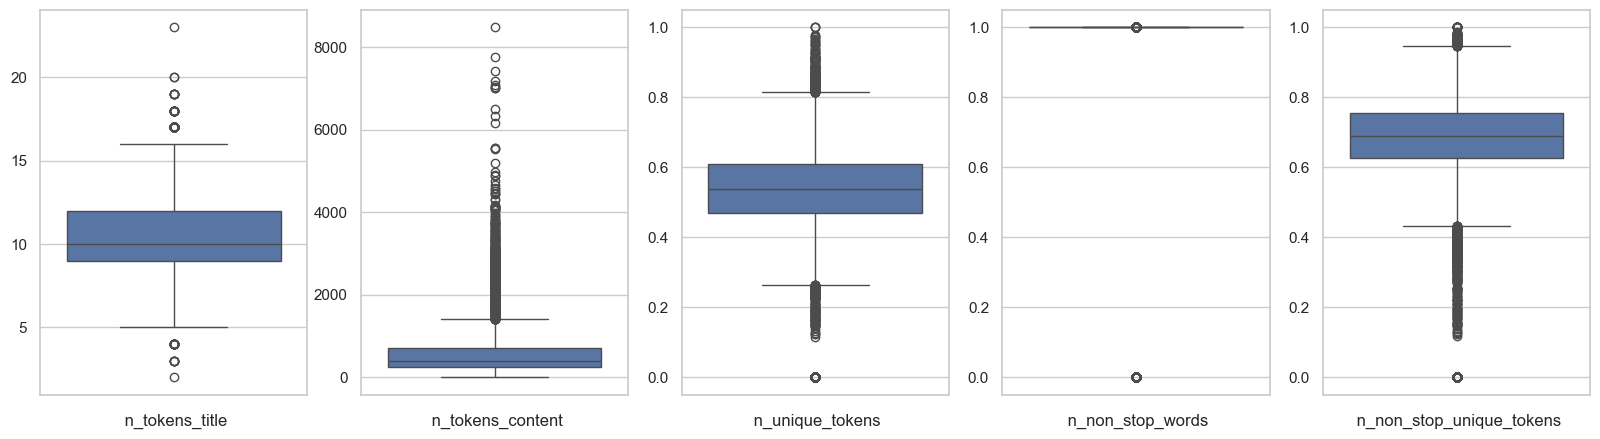

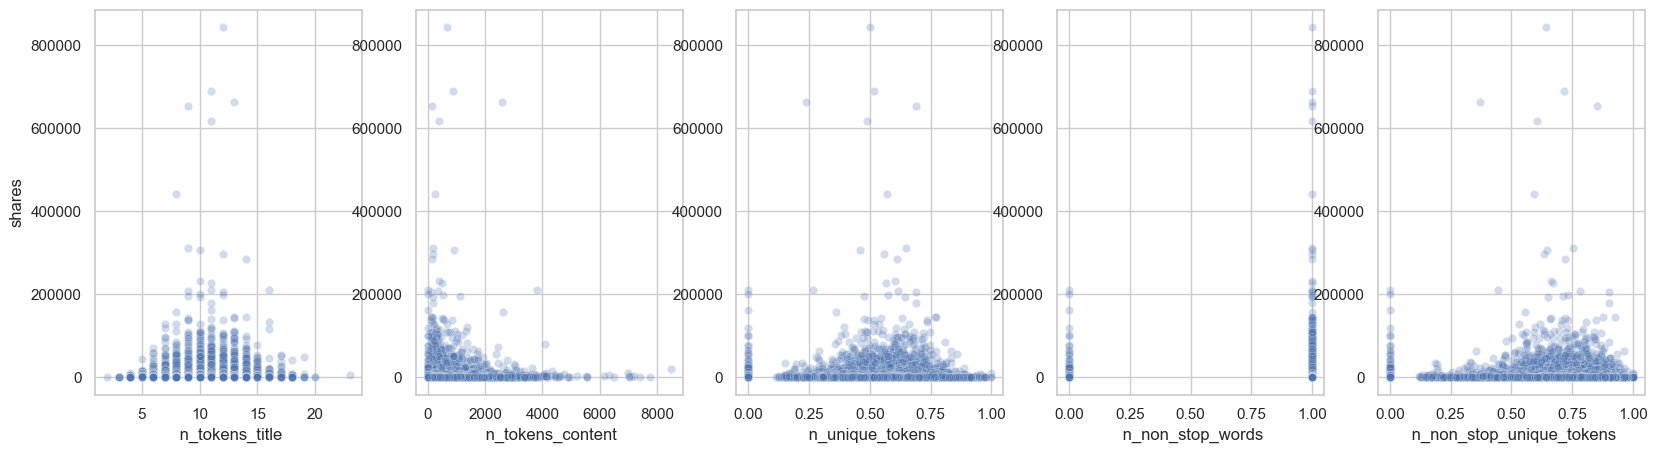

In [7]:
articles_raw = articles_raw[articles_raw[' n_non_stop_words'] != 1042]
box([" n_tokens_title", " n_tokens_content", " n_unique_tokens", ' n_non_stop_words', ' n_non_stop_unique_tokens'])
scatter([" n_tokens_title", " n_tokens_content", " n_unique_tokens", ' n_non_stop_words', ' n_non_stop_unique_tokens'])

From the plot, we can see ' n_non_stop_words' only have values in 0 or 1, but it should be the the proportion of the non stop words, so we will go ahead and drop the field of ' n_non_stop_words'.

In [8]:
articles_raw.drop(' n_non_stop_words', axis = 1, inplace=True)

| Variables                   | Definition                            | Data type  | Distribution | Correlation | Explanation                                                                                                                                                         |
|-----------------------------|---------------------------------------|------------|--------------|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| num_hrefs                   | Number of links                       | Numerical  | Right-Skewed | Non-Linear | The total number of links on a webpage.                                     |
| num_self_hrefs              | Number of links to other articles published by Mashable | Numerical | Right-Skewed | Non-Linear | This variable represents the number of links to other articles published by Mashable within the article.                                      |
| num_imgs                    | Number of images                      | Numerical  | Right-Skewed | Non-Linear | This variable represents the number of images in the article.                                  |
| num_videos                  | Number of videos                      | Numerical  | Right-Skewed | Non-Linear | This variable represents the number of videos in the article.                                  |

__Feature Selection:__  
From the plot, we found that most of the distributions are right-skewed. The number of links, images, and videos in an article can significantly impact its popularity. Therefore, we can combine these features in our analysis. By examining how these elements correlate with popularity metrics, we can better understand the correlate with the article.

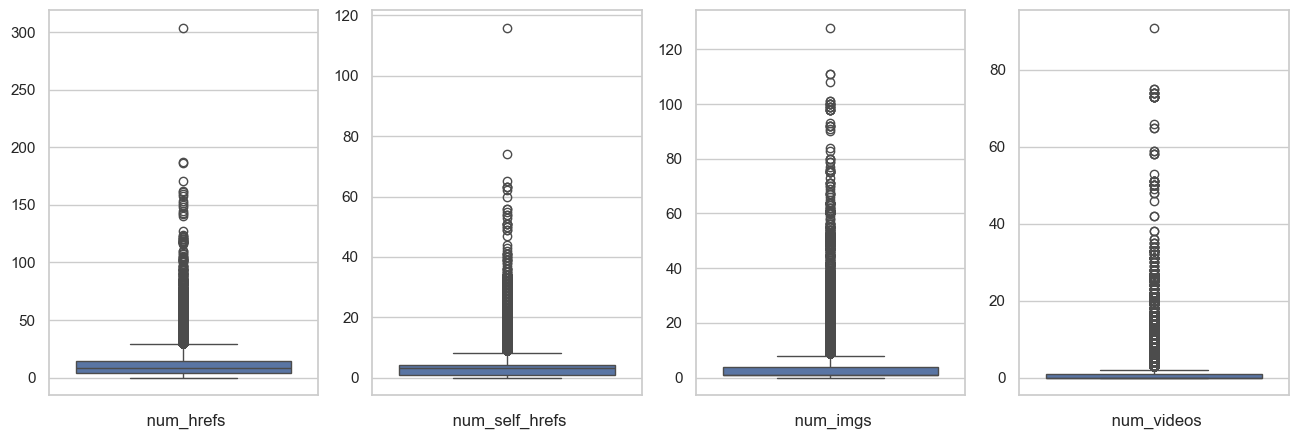

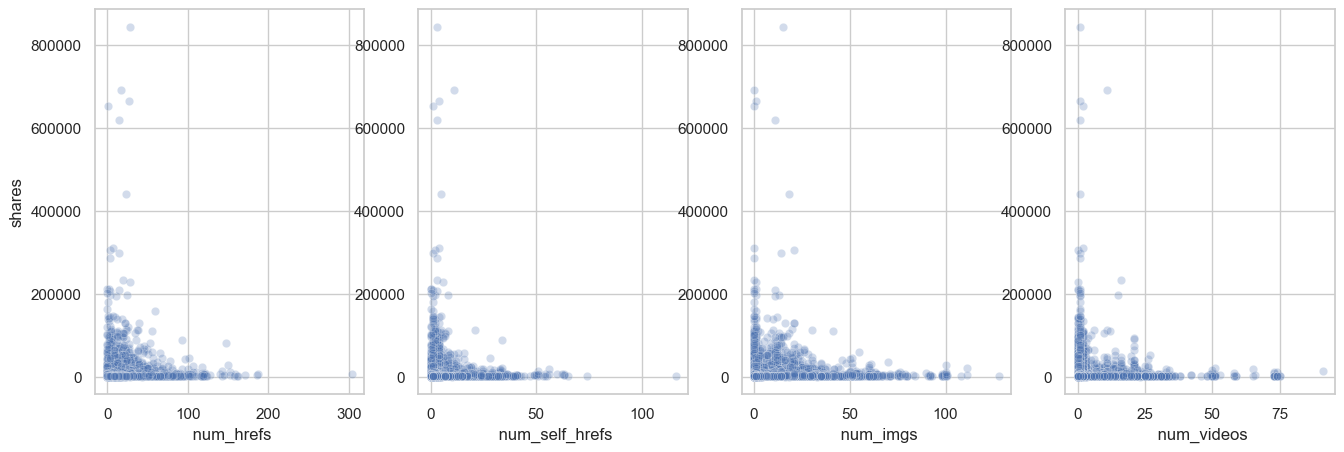

In [9]:
box([' num_hrefs', ' num_self_hrefs', ' num_imgs',' num_videos'])
scatter([' num_hrefs', ' num_self_hrefs', ' num_imgs',' num_videos'])

| Variables                   | Definition                            | Data type  | Distribution | Correlation | Explanation                                                                                                                                                         |
|-----------------------------|---------------------------------------|------------|--------------|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| data_channel_is_lifestyle   | Is data channel 'Lifestyle'?          | Categorical| Binary       | N/A         | This variable indicates whether the article belongs to the 'Lifestyle' data channel.                                 |
| data_channel_is_entertainment| Is data channel 'Entertainment'?     | Categorical| Binary       | N/A         | This variable indicates whether the article belongs to the 'Entertainment' data channel.                            |
| data_channel_is_bus         | Is data channel 'Business'?           | Categorical| Binary       | N/A         | This variable indicates whether the article belongs to the 'Business' data channel.                                   |
| data_channel_is_socmed      | Is data channel 'Social Media'?      | Categorical| Binary       | N/A         | This variable indicates whether the article belongs to the 'Social Media' data channel.                               |
| data_channel_is_tech        | Is data channel 'Tech'?              | Categorical| Binary       | N/A         | This variable indicates whether the article belongs to the 'Tech' data channel.                                       |
| data_channel_is_world       | Is data channel 'World'?             | Categorical| Binary       | N/A         | This variable indicates whether the article belongs to the 'World' data channel.                                      |

- __Feature Selection:__  
For variables 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', and 'data_channel_is_world', these represent different categories of articles. Most articles belong to only one category. Therefore, we can merge the data channels into a single column, showing the specific category to which an article belongs. This step will simplify our dataset, we can more easily explore how different content types in articles.

__kw_min_min - kw_avg_avg__  
| Variables   | Definition          | Data type  | Distribution | Correlation   |
|-------------|---------------------|------------|--------------|---------------|
| kw_min_min  | Worst keyword (min. shares)  |  Numeric |  Right-Skewed  | Non-Linear  |
| kw_max_min |   Worst keyword (max. shares)  | Numeric  |  Right-Skewed  |  Non-Linear  |
| kw_avg_min| Worst keyword (avg. shares)  | Numeric  |  Right-Skewed |  Non-Linear  |
| kw_min_max  | Best keyword (min. shares)  | Numeric | Right-Skewed |  Non-Linear  |
| kw_max_max  | Best keyword (max. shares)  | Numeric | Left-Skewed |  Non-Linear    |   
| kw_avg_max  | Best keyword (avg. shares)  |  Numeric   | Close to normal | Non-Linear   |
|  kw_min_avg  | Avg. keyword (min. shares)  | Numeric |  Right-Skewed   | Non-Linear   |    
|  kw_max_avg  | Avg. keyword (max. shares) | Numeric  |  Right-Skewed   |  Non-Linear  |    
|  kw_avg_avg  | Avg. keyword (avg. shares)  | Numeric   | Right-Skewed  |  Non-Linear  |    
- __Feature Selection:__  
We can see that there is no linear relationship between the keyword and shares. About the information we can get. We mainly divide it into 3 aspects:  
When the keywords are worst. The minimum average and maximum shares have the same trend. All the values are high when they are 0, which means the fewer worst keywords, the more shares.   
When the keywords are best with best situation, the more best keywords, the more shares. When the keywords are best with average situation, they are randomly distributed. When the keywords are best with worst situation, the less best keywords, the less shares.  
When the  keywords are average with best situation, the less average keywords, the less shares. When the  keywords are average with average situation, the share is randomly distributed around low shares. When the keywords are average with worst situation, the less keywords, the less shares.

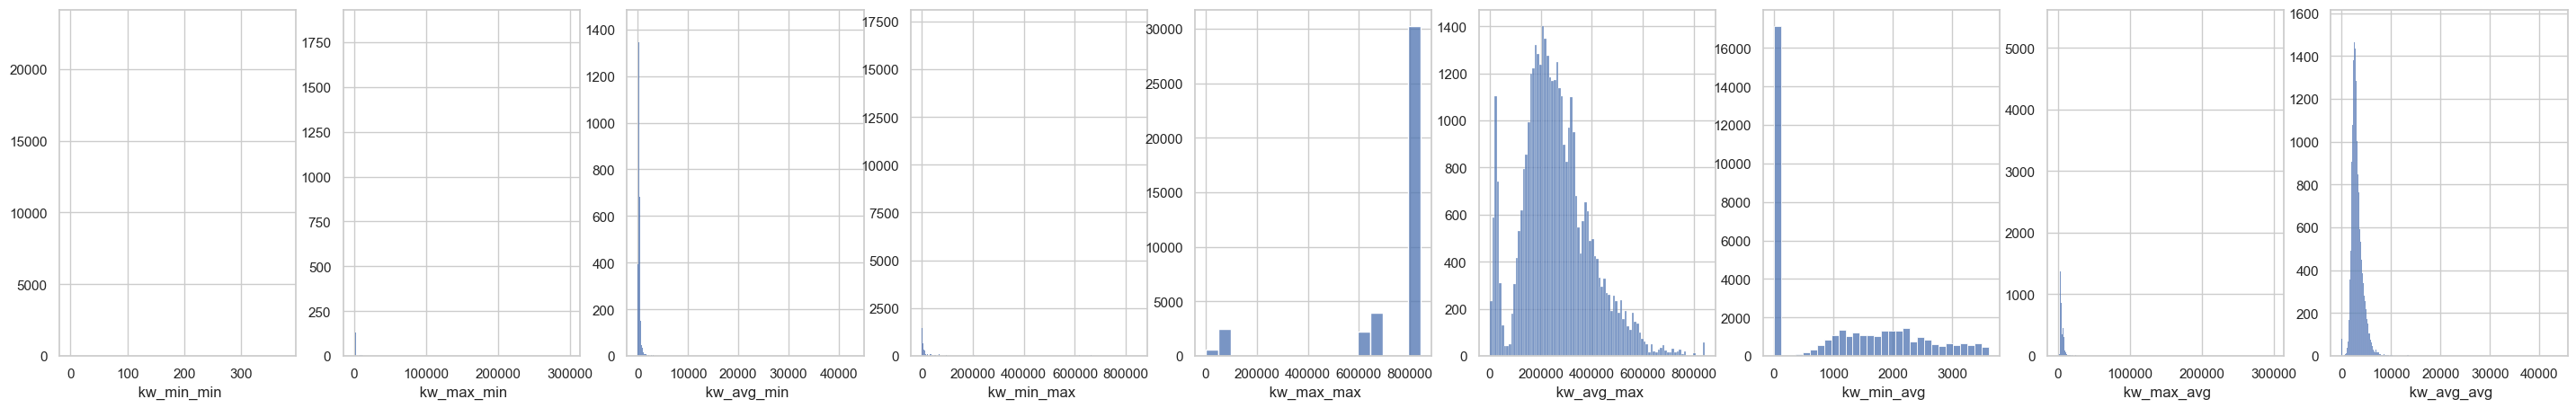

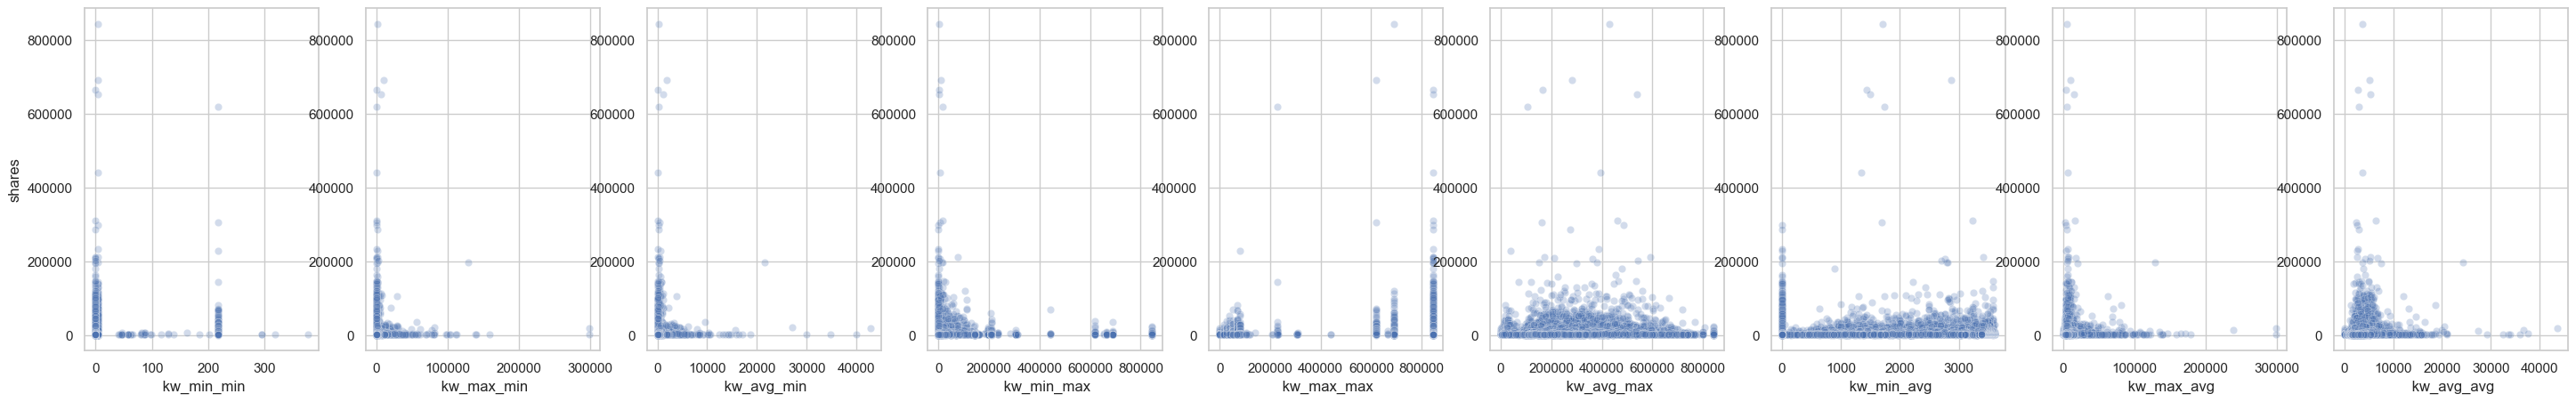

In [10]:
hist([' kw_min_min',' kw_max_min',' kw_avg_min',' kw_min_max',' kw_max_max',' kw_avg_max',' kw_min_avg',' kw_max_avg',' kw_avg_avg'])
scatter([' kw_min_min', ' kw_max_min', ' kw_avg_min',' kw_min_max', ' kw_max_max',' kw_avg_max',' kw_min_avg',' kw_max_avg',' kw_avg_avg'])

__self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess__  

| Variables   | Definition          | Data type  | Distribution | Correlation   |
|-------------|---------------------|------------|--------------|---------------|
| self_reference_min_shares  |  Min. shares of referenced articles in Mashable                   | Numeric   | Right-Skewed  | Non-Linear   |
| self_reference_max_shares| Max. shares of referenced articles in Mashable                    |  Numeric |  Right-Skewed  |  Non-Linear      |
| self_reference_avg_sharess| Avg. shares of referenced articles in Mashable                     |  Numeric   | Right-Skewed |  Non-Linear    |
- __Feature Selection:__ 
The chart below mainly present that if an article cites many articles with high shares, it may itself get more shares. Conversely, if an article primarily cites articles with lower shares, it may not be as popular. This data can be used to help predict how an article will perform on social networks. We can see that the less the article cite, the more shares. But it has no pattern in linear relationship.

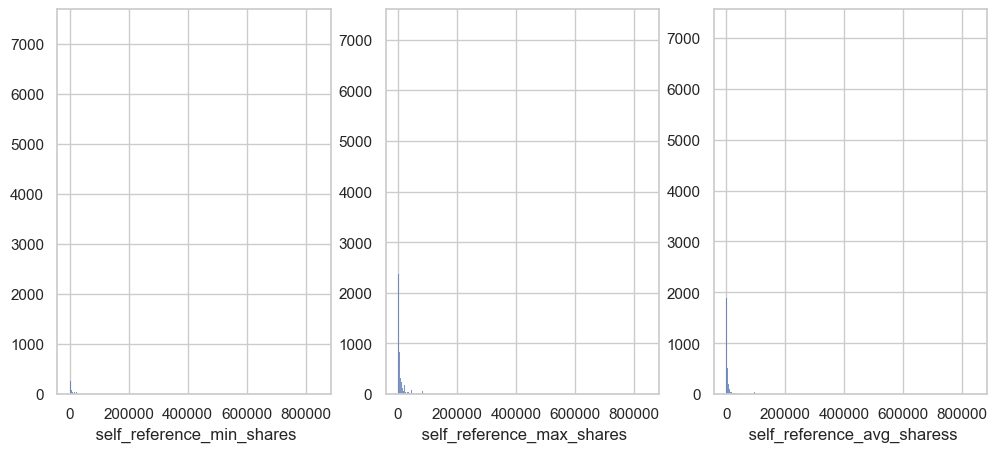

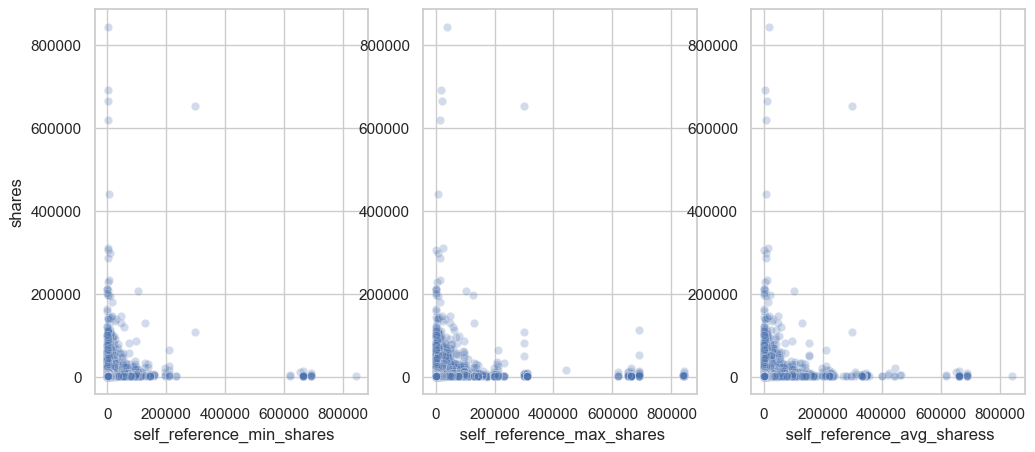

In [11]:
hist([ ' self_reference_min_shares',' self_reference_max_shares', ' self_reference_avg_sharess'])
scatter([ ' self_reference_min_shares',' self_reference_max_shares', ' self_reference_avg_sharess'])

__weekday_is_monday - is_weekend__  
| Variables   | Definition          | Data type  |  Correlation   |
|-------------|---------------------|------------|---------------|
| weekday_is_monday  | Was the article published on a Monday?  |  Categorical |     Non-Linear  |
| weekday_is_tuesday: |   Was the article published on a Tuesday?  | Categorical   |  Non-Linear  |
|weekday_is_wednesday| Was the article published on a Wednesday? | Categorical |  Non-Linear  |
| weekday_is_thursday| Was the article published on a Thursday?  | Categorical |  Non-Linear  |
| weekday_is_friday|Was the article published on a Friday?  | Categorical |  Non-Linear    |   
| weekday_is_saturday|Was the article published on a Saturday? | Categorical   | Non-Linear   |
| weekday_is_sunday | Avg. keyword (min. shares)  | Categorical  | Non-Linear   |    
|is_weekend| Avg. keyword (max. shares) | Categorical   |  Non-Linear  |    
- __Feature Selection:__ 
It is obvious that there is no strong relationship between shares and weekday. But Saturday and Sunday takes low percentage. These variables also have no linear relationship with the target.  

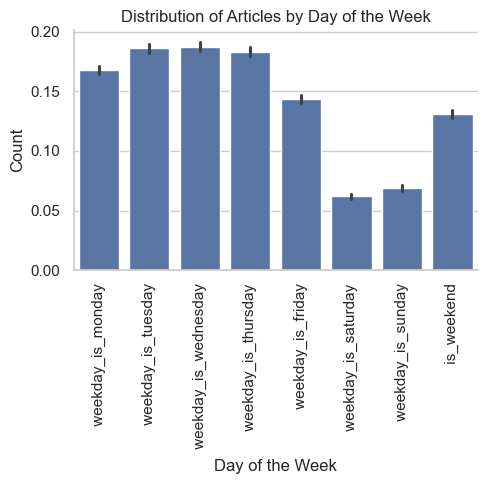

In [12]:
week = articles_raw.melt(value_vars=[' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', 
                                ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', 
                                ' weekday_is_sunday', ' is_weekend'],
                     var_name='Day', value_name='Value')
sns.catplot(x='Day', y='Value', data=week, kind='bar')

plt.xticks(rotation=90)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Distribution of Articles by Day of the Week')
plt.tight_layout() 
plt.show()

Text(0.5, 1.0, 'Total Shares by Day of the Week')

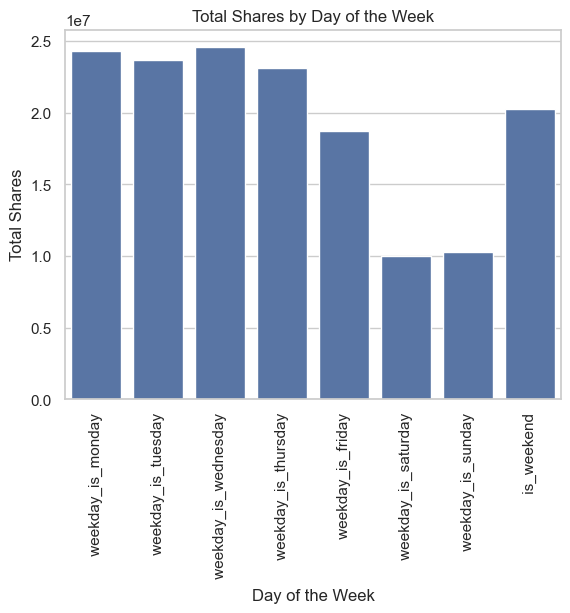

In [13]:
days = [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend']
shares_per_day = pd.DataFrame({day: articles_raw[articles_raw[day] == 1][' shares'].sum() for day in days}, index=[0])
melted_shares_per_day = shares_per_day.melt(var_name='Day', value_name='Total Shares')

sns.barplot(x='Day', y='Total Shares', data=melted_shares_per_day)
plt.xticks(rotation=90)
plt.xlabel('Day of the Week')
plt.ylabel('Total Shares')
plt.title('Total Shares by Day of the Week')

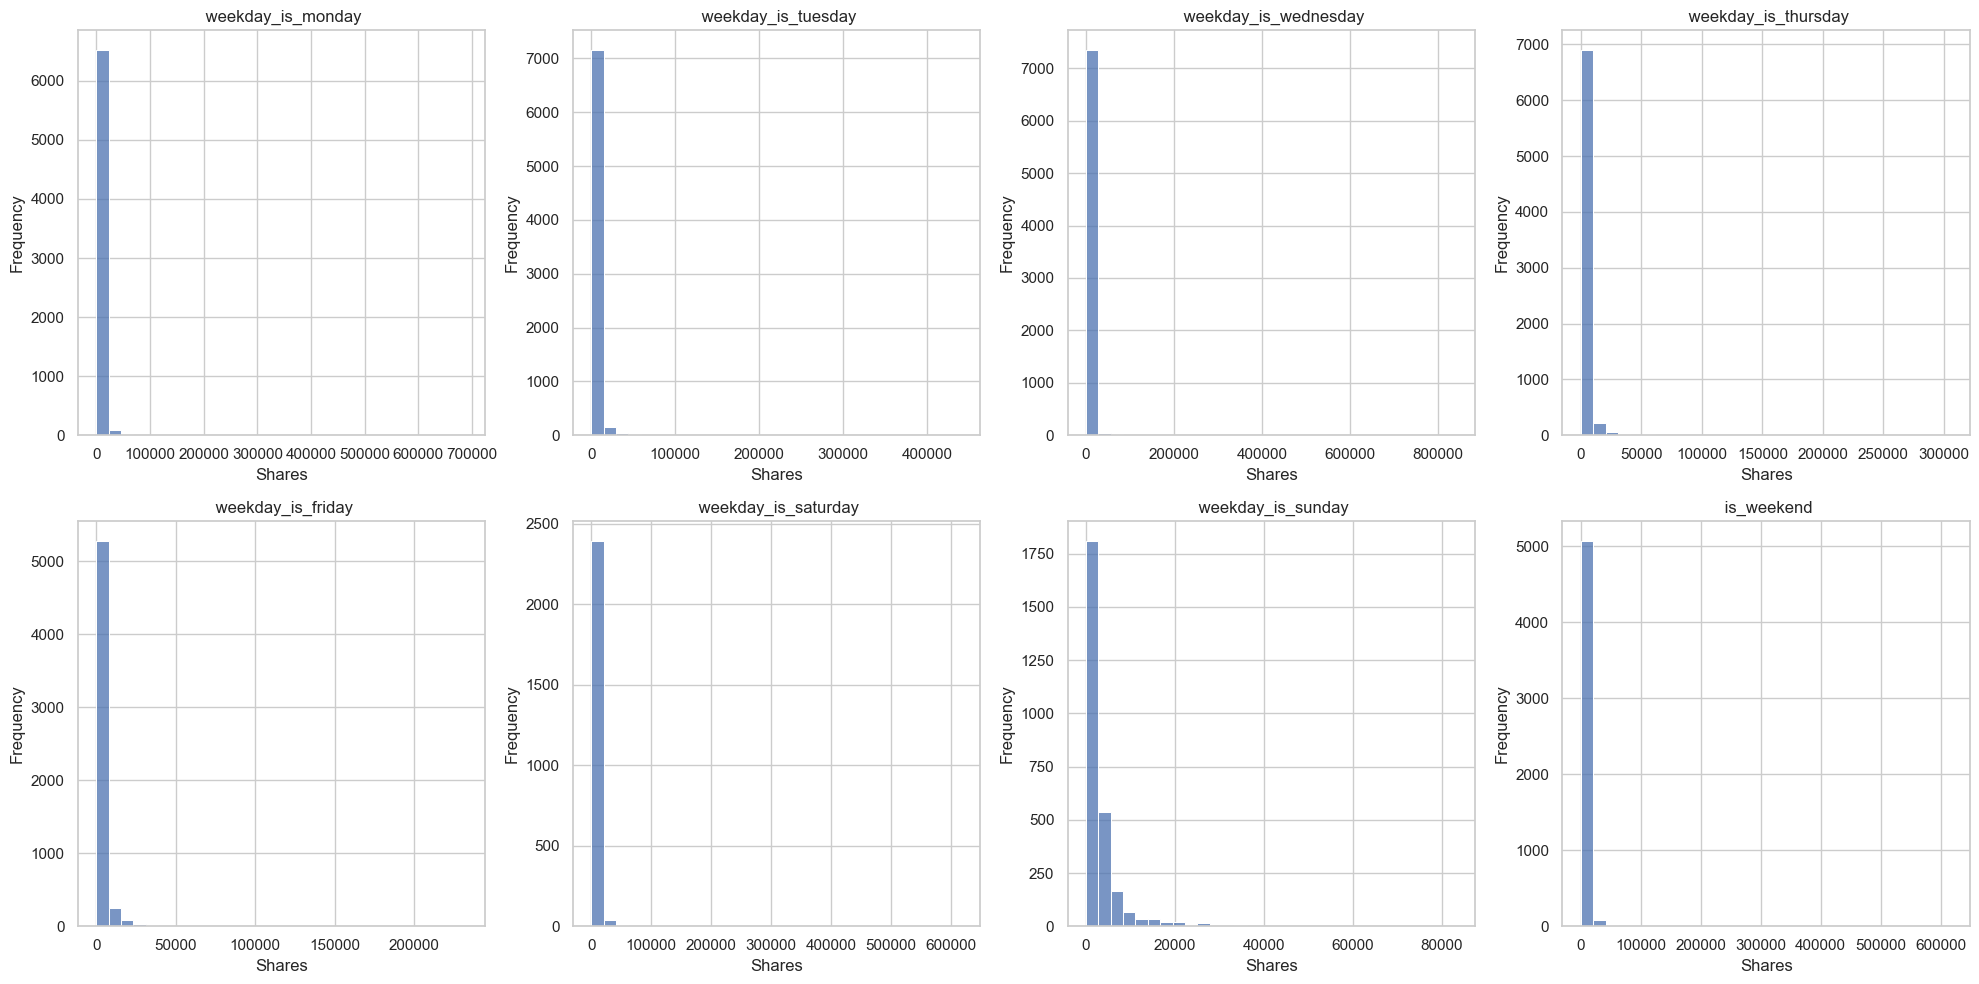

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten() 

for i, day in enumerate(days):
    data = articles_raw[articles_raw[day] == 1][' shares']
    sns.histplot(data, ax=axes[i], kde=False, bins=30)
    axes[i].set_title(day)
    axes[i].set_xlabel('Shares')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

| Variables   | Definition          | Data type  | Distribution | Correlation   | Explaination|
|-------------|---------------------|------------|--------------|---------------|-------------|
| __LDA_00 - LDA_04__   | Closeness to LDA topic 0 | Numerical  | Right-Skewed | Non-Linear    |These features represent the closeness of the text content to each of the five topics identified by Latent Dirichlet Allocation (LDA), a topic modeling technique used to discover abstract topics in a collection of documents. Higher values indicate that the text content is more closely related to the respective LDA topic. From the histogram we can see that most value are distributed in the lower value.|

    
__Explaination:__  
These features represent the closeness of the text content to each of the five topics identified by Latent Dirichlet Allocation (LDA), a topic modeling technique used to discover abstract topics in a collection of documents. Higher values indicate that the text content is more closely related to the respective LDA topic. From the histogram we can see that most value are distributed in the lower value.

__Feature Selection:__  
From the scatter plot of LDA_00 to LDA_04, we can see that the data seem to have more higher value and more outliers at lower value of LDA. There is no linear relationship between these attributes and the response variable thus it will be filtered.

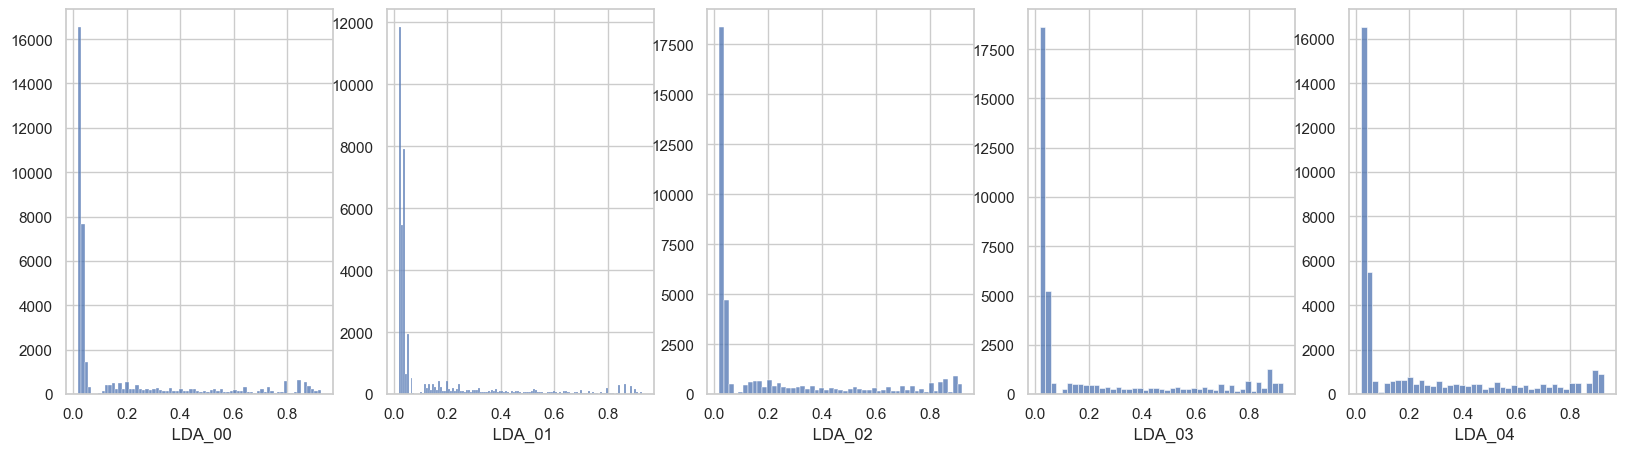

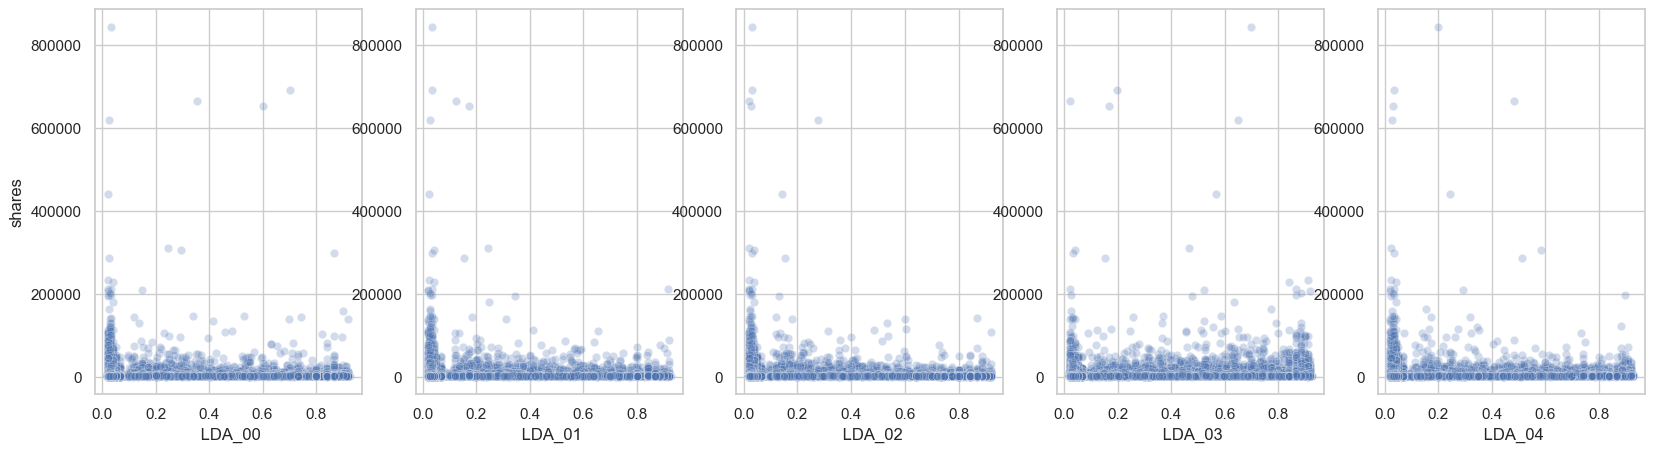

In [15]:
hist([' LDA_00', ' LDA_01', ' LDA_02',' LDA_03', ' LDA_04'])
scatter([' LDA_00', ' LDA_01', ' LDA_02',' LDA_03', ' LDA_04'])

| Variables                | Definition                                       | Data type | Distribution   | Correlation | Explanation                                                                       |
|--------------------------|--------------------------------------------------|-----------|----------------|-------------|-----------------------------------------------------------------------------------|
| global_subjectivity      | Text subjectivity                                | Numeric   | Close to Normal| Non-Linear  | This attribute represents the subjectivity of the text content on a scale of 0-1.  |
| global_sentiment_polarity| Text sentiment polarity                          | Numeric   | Close to Normal| Non-Linear  | This attribute refers to the positivity or negativity of the text. From the box plot we can see there are positive and negative values.               |
| global_rate_positive_words| Rate of positive words in the content            | Numeric   | Right-Skewed   | Non-Linear  | This attribute is the rate of positive words in the content. |
| global_rate_negative_words| Rate of negative words in the content            | Numeric   | Right-Skewed   | Bimodal  | This attribute is the rate of negative words in the content. |
| rate_positive_words      | Rate of positive words among non-neutral tokens  | Numeric   | Left-Skewed    | Non-Linear | This attribute is the rate of positive words excluding the neutral words on a scale of 0-1.|
| rate_negative_words      | Rate of negative words among non-neutral tokens  | Numeric   | Right-Skewed   |    Non-Linear   | This attribute is the rate of negative words excluding the neutral words on a scale of 0-1.|

__Feature Selection:__  
These variables has no relationship with the response variable, except global_rate_negative_words seems to have more value at lower value of negative_words. 'rate_positive_words' and 'rate_negative_words' are highly correlated because they always adds up to 1, thus needed to be filtered if selected to be a explanatory variable. There is a pattern of distribution for 'global_subjectivity' and 'global_sentiment_polarity', there are more higher 'shares' when the value is at the center of the distribution. 

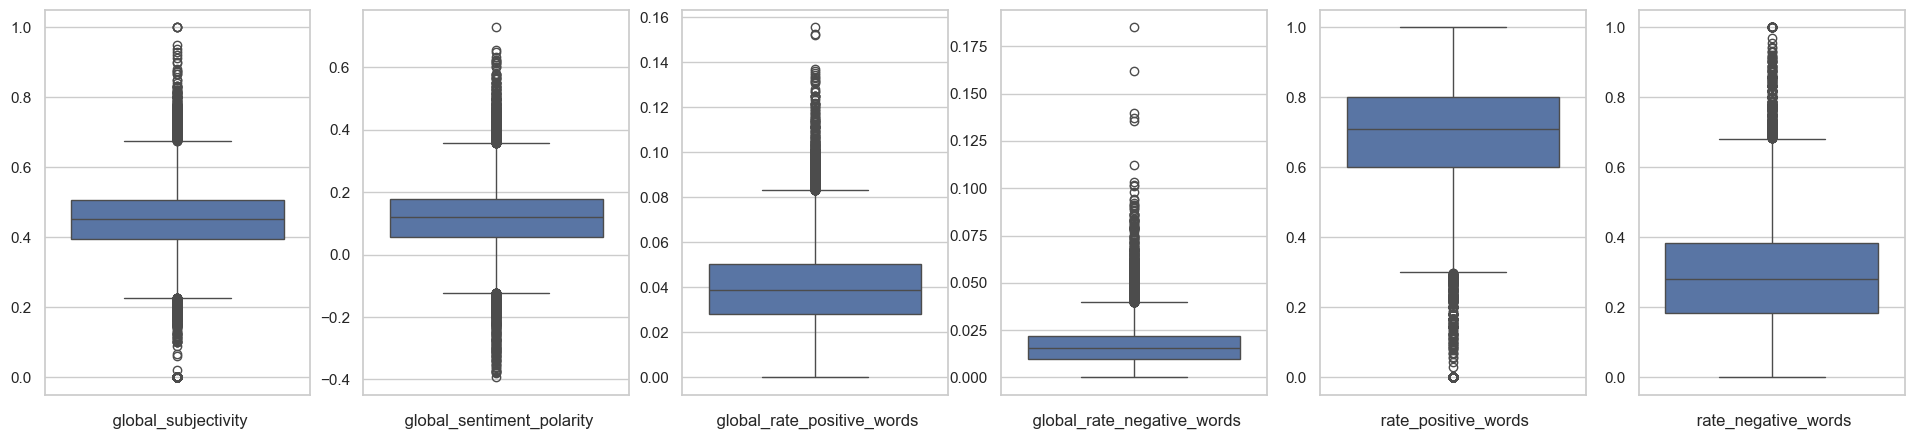

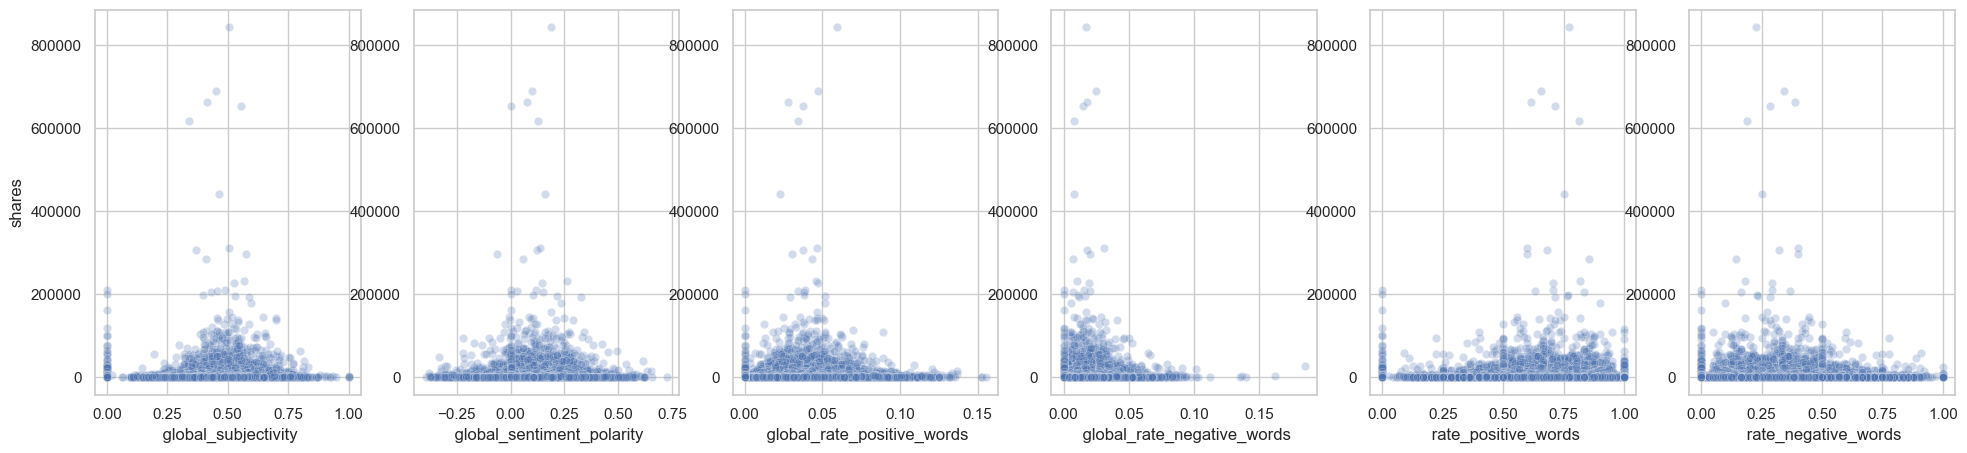

In [16]:
box([' global_subjectivity',' global_sentiment_polarity', ' global_rate_positive_words',' global_rate_negative_words', ' rate_positive_words',' rate_negative_words'])
scatter([' global_subjectivity',' global_sentiment_polarity', ' global_rate_positive_words',' global_rate_negative_words', ' rate_positive_words',' rate_negative_words'])

| Variables                 | Definition                                | Data type | Distribution   | Correlation | Explanation                                                                       |
|---------------------------|-------------------------------------------|-----------|----------------|-------------|-----------------------------------------------------------------------------------|
| avg_positive_polarity     | Avg. polarity of positive words           | Numeric   | Close to Normal |  Non-Linear | This attribute describes how positive the positive words are on a scale of 0-1. |
| min_positive_polarity     | Min. polarity of positive words           | Numeric   |  Right-Skewed   |  Non-Linear | This attribute describes the minimum positivity the positive words are on a scale of 0-1. |
| max_positive_polarity     | Max. polarity of positive words           | Numeric   |  Left-Skewed  |  Non-Linear | This attribute describes the maximum positivity the positive words are on a scale of 0-1.|
| avg_negative_polarity     | Avg. polarity of negative words           | Numeric   |  Left-Skewed    | Non-Linear  | This attribute describes how negative the negative words are on a scale of -1-0. |
| min_negative_polarity     | Min. polarity of negative words           | Numeric   |  Close to Normal   |   Non-Linear      | This attribute describes the minimum negativity the negative words are on a scale of -1-0.|
| max_negative_polarity     | Max. polarity of negative words           | Numeric   |  Left-Skewed  |  Non-Linear | This attribute describes the maximum negativity the negative words are on a scale of -1-0.|
- __Feature Selection:__  
For 'avg_positive_polarity' and 'avg_negative_polarity', there are more higher 'shares' when the value is at the center of the distribution, while 'min_positive_polarity' and 'max_negative_polarity' shows a higher distribution when closer to 0. The other shows barely no pattern in correlation.

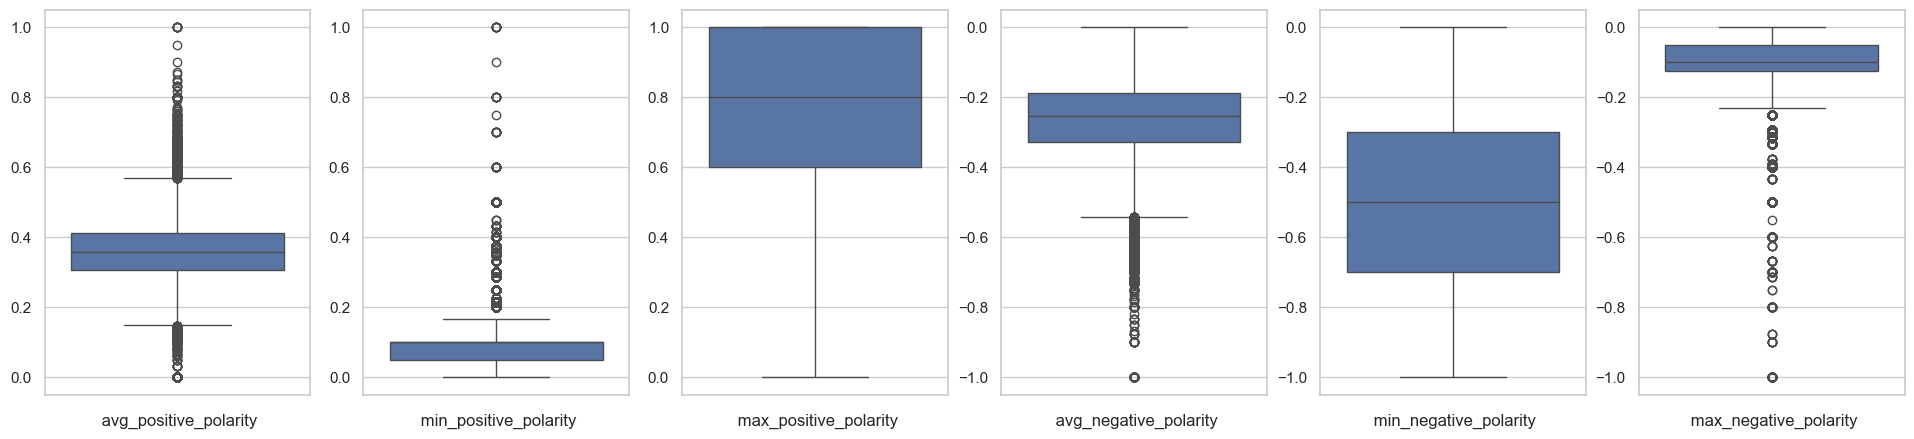

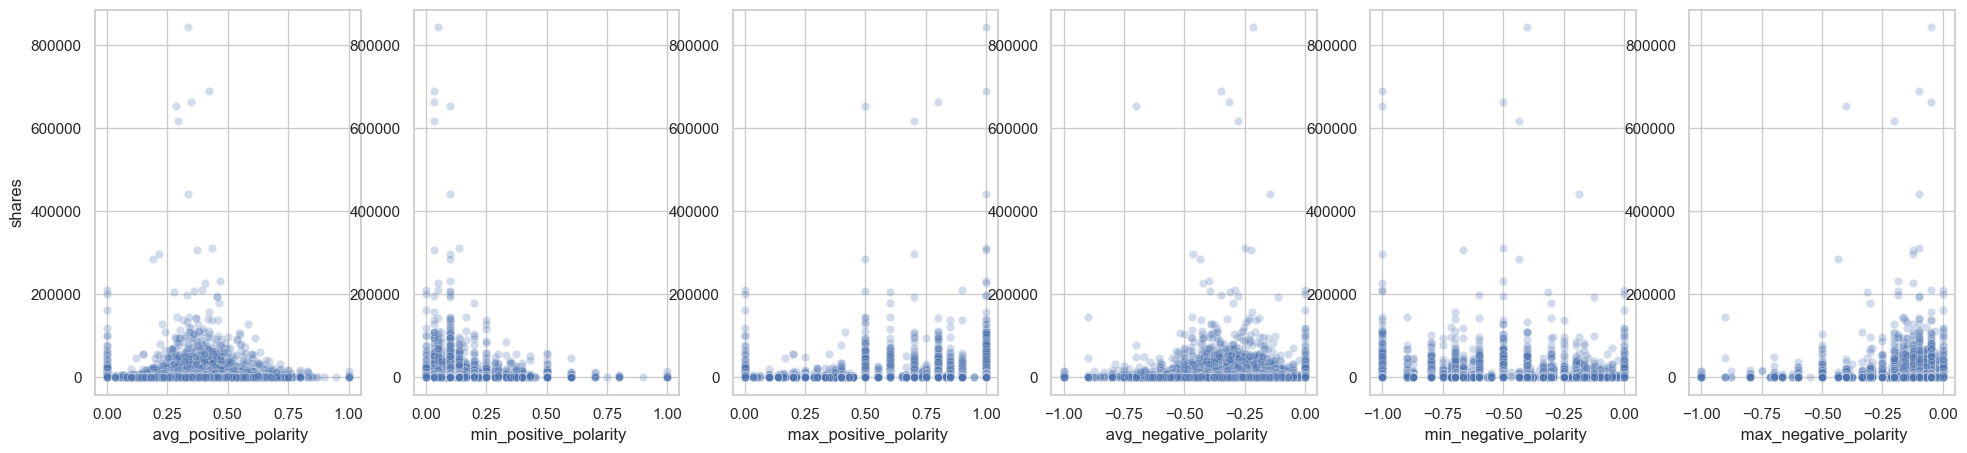

In [17]:
box([' avg_positive_polarity',' min_positive_polarity', ' max_positive_polarity',' avg_negative_polarity', ' min_negative_polarity',' max_negative_polarity'])
scatter([' avg_positive_polarity',' min_positive_polarity', ' max_positive_polarity',' avg_negative_polarity', ' min_negative_polarity',' max_negative_polarity'])

| Variables                     | Definition                            | Data type | Distribution | Correlation | Explanation                                                                        |
|-------------------------------|---------------------------------------|-----------|--------------|-------------|------------------------------------------------------------------------------------|
| title_subjectivity            | Title subjectivity                    | Numeric   | Right-Skewed  |  Non-Linear  | This variable represents the subjectivity of the title of the article on a scale of 0-1.              |
| title_sentiment_polarity      | Title polarity                        | Numeric   |  Close to normal  |  Non-Linear | This variable represents the polarity (positivity or negativity) of the title of the article on a scale of 0-1. |
| abs_title_subjectivity        | Absolute subjectivity level           | Numeric   |  Left-Skewed | Non-Linear | This variable represents the absolute level of subjectivity in the title of the article on a scale of 0-0.5. |
| abs_title_sentiment_polarity  | Absolute polarity level               | Numeric   |  Right-Skewed |   Non-Linear  | This variable represents the absolute level of polarity (positivity or negativity) in the title of the article on a scale of 0-1. |

- __Feature Selection:__  
'title_subjectivity' and 'title_sentiment_polarity' seems to have a weak distribution pattern with the shares, and the other two attributes are kind of correlated because the are the absolute value of the first two attributes. But they have less information, thus can be filtered.

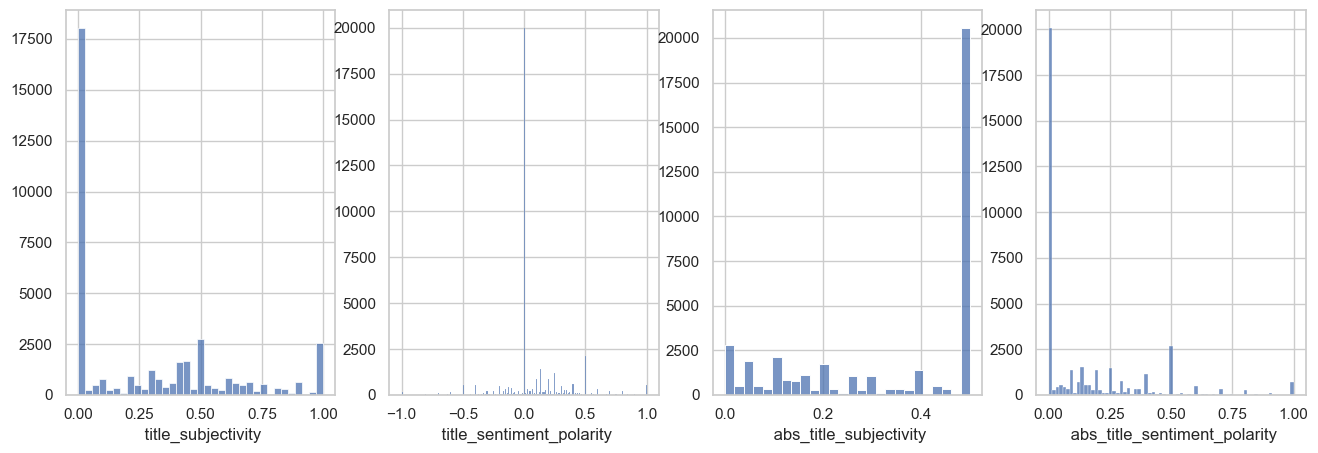

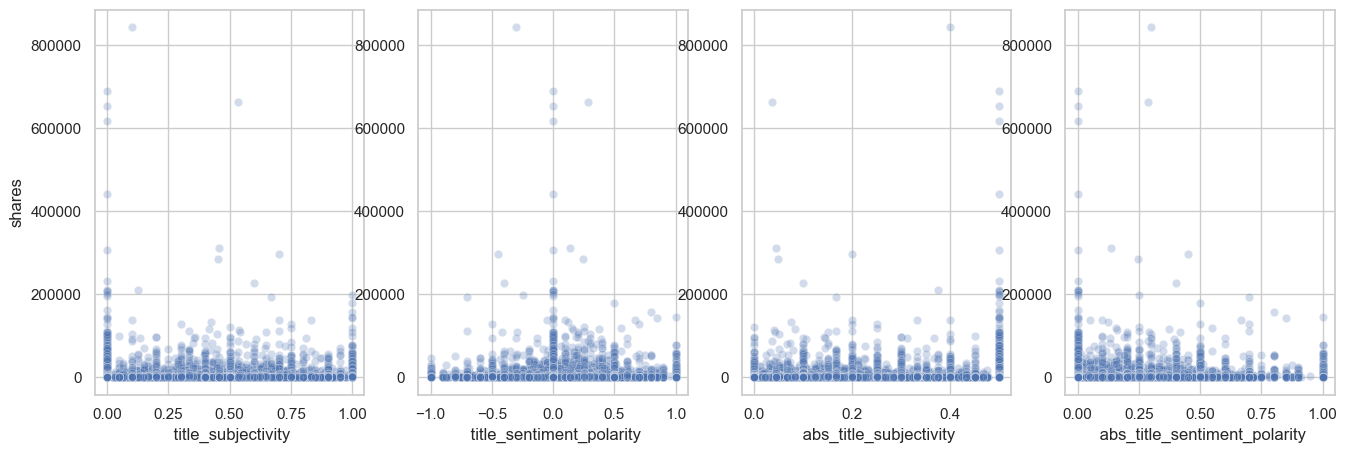

In [18]:
hist([ ' title_subjectivity',' title_sentiment_polarity', ' abs_title_subjectivity',' abs_title_sentiment_polarity'])
scatter([ ' title_subjectivity',' title_sentiment_polarity', ' abs_title_subjectivity',' abs_title_sentiment_polarity'])

In [19]:
articles = articles_raw
articles

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


# 3. Data Preparation

__Principle Component Analysis__

- In this part we take all the numeric variables that has a certain distribution pattern with the response variable, and try to use PCA to reduce the dimension of the dataset. There are 35 numeric varibles selected, the others are filtered according to EDA process.  
- After selecting the explanatory variables, we scale the data using StandardScaler so that PCA will not have a biased scaling problem.  
- We can tell from the explained variance ratio chart below, the data can not be explained by few PCs, the line is following a smooth trend and does not have a clear elbow. 

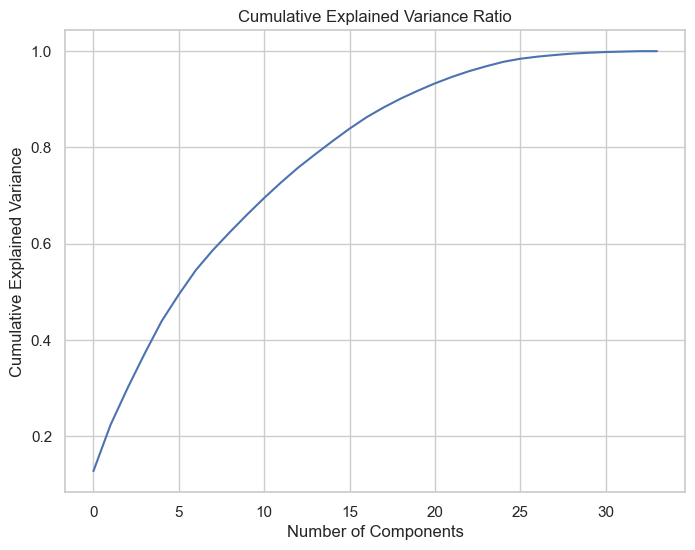

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numerical=[" n_tokens_title", " n_tokens_content", " n_unique_tokens"
    ,' n_non_stop_unique_tokens',' num_hrefs', ' num_self_hrefs', ' num_imgs',' num_videos',' LDA_00'
    , ' LDA_01', ' LDA_02',' LDA_03', ' LDA_04',' global_subjectivity',' global_sentiment_polarity'
    , ' global_rate_positive_words',' global_rate_negative_words', ' rate_positive_words'
    ,' avg_positive_polarity',' min_positive_polarity',' avg_negative_polarity',' max_negative_polarity'
    ,' title_subjectivity',' title_sentiment_polarity',' kw_min_min', ' kw_max_min', ' kw_avg_min'
    ,' kw_min_max', ' kw_max_max',' kw_max_avg',' kw_avg_avg',' self_reference_min_shares',' self_reference_max_shares'
    , ' self_reference_avg_sharess']

X = articles[numerical].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


Under the consideration of explained data variance and dimensionality reduction, we will take PC1-PC12, which accounts for over 70% of data variance, as variables for the linear regression model. 

In [21]:
n_components = 12
X_pca_selected = X_pca[:, :n_components]
column_names = [f"PC{i}" for i in range(1, X_pca_selected.shape[1] + 1)]
pca_df = pd.DataFrame(data=X_pca_selected, columns=column_names)

sum_ratio=0
for i, ratio in enumerate(pca.explained_variance_ratio_, 1):
    sum_ratio+=ratio
    print(f"Principal Component 1 to {i}: Explained Variance Ratio = {sum_ratio:.4f}")
    if i == n_components:
        break

Principal Component 1 to 1: Explained Variance Ratio = 0.1268
Principal Component 1 to 2: Explained Variance Ratio = 0.2227
Principal Component 1 to 3: Explained Variance Ratio = 0.2994
Principal Component 1 to 4: Explained Variance Ratio = 0.3712
Principal Component 1 to 5: Explained Variance Ratio = 0.4389
Principal Component 1 to 6: Explained Variance Ratio = 0.4939
Principal Component 1 to 7: Explained Variance Ratio = 0.5449
Principal Component 1 to 8: Explained Variance Ratio = 0.5866
Principal Component 1 to 9: Explained Variance Ratio = 0.6241
Principal Component 1 to 10: Explained Variance Ratio = 0.6603
Principal Component 1 to 11: Explained Variance Ratio = 0.6948
Principal Component 1 to 12: Explained Variance Ratio = 0.7275


The PCA plot is shown below. It can be seen that there are some kind of distribution for these PCs. But the linear relationship is not obvious.

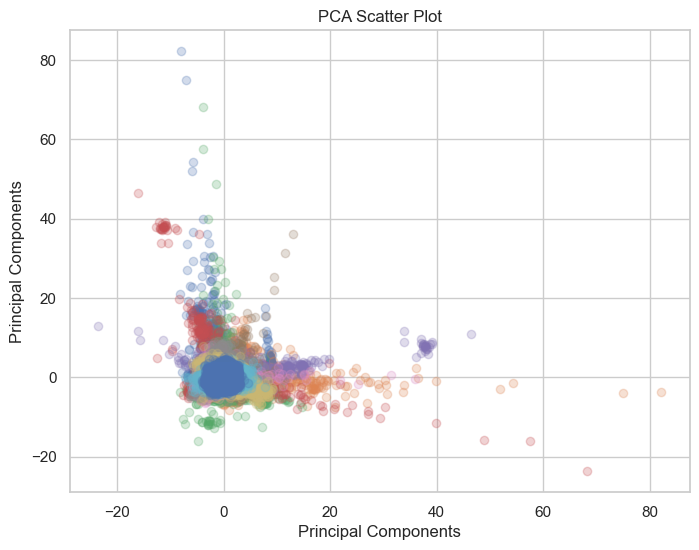

In [22]:
# Visualize the first two principal components
plt.figure(figsize=(8, 6))
for i in range(n_components-1):
    plt.scatter(X_pca_selected[:, i], X_pca_selected[:, i+1], alpha=0.25)
    plt.xlabel('Principal Components')
    plt.ylabel('Principal Components')
    plt.title('PCA Scatter Plot')
    plt.grid(True)
plt.show()

The PC dataframe that we will be using for the linear regression model.

In [23]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.705263,-2.641807,-1.365689,0.062082,-0.000592,1.667535,-0.551650,-1.340903,0.746196,-1.095829,0.043843,0.802387
1,-0.005815,-3.169968,-0.343239,1.562553,1.110984,1.600993,-0.555745,-1.857146,0.669309,1.158785,0.044639,0.610009
2,-3.149982,-2.974180,0.627681,0.627565,0.473246,1.444872,-0.355688,0.627629,0.870632,-0.168748,0.629627,-0.539855
3,-0.200576,-2.542859,-1.076832,-0.369140,-0.252513,2.287562,-0.005791,0.124869,0.572695,-0.797369,-0.805161,1.307950
4,-1.262598,-2.057357,5.038035,-0.697702,0.255914,2.318707,-0.154140,1.278145,-0.389528,-1.070651,1.142730,-0.881811
...,...,...,...,...,...,...,...,...,...,...,...,...
39638,-0.375208,-0.002202,0.218780,-0.377741,1.848326,-0.225150,0.820407,1.126287,0.015160,-0.037711,1.248735,-0.974832
39639,-2.343406,1.275316,0.186070,-1.488755,-1.453315,-0.834521,-3.303636,-1.258222,-3.914712,2.242476,-2.506920,-2.750642
39640,0.215148,1.367887,-0.604948,-1.286101,-1.313683,-0.318064,-0.908116,0.368617,0.771425,0.197721,0.052425,-0.709600
39641,2.549116,-1.329750,-1.214309,-0.564540,0.134505,0.519643,1.697445,0.264831,-0.240692,1.239908,-0.998320,0.259154


Concat the PCA dataframe with the categorical variables.

In [24]:
categorical= [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday',' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world']
cat_df = articles[categorical].reset_index()
explanatory_variables = pd.concat([pca_df, cat_df], axis=1)
explanatory_variables

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,-1.705263,-2.641807,-1.365689,0.062082,-0.000592,1.667535,-0.551650,-1.340903,0.746196,-1.095829,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.005815,-3.169968,-0.343239,1.562553,1.110984,1.600993,-0.555745,-1.857146,0.669309,1.158785,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-3.149982,-2.974180,0.627681,0.627565,0.473246,1.444872,-0.355688,0.627629,0.870632,-0.168748,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.200576,-2.542859,-1.076832,-0.369140,-0.252513,2.287562,-0.005791,0.124869,0.572695,-0.797369,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.262598,-2.057357,5.038035,-0.697702,0.255914,2.318707,-0.154140,1.278145,-0.389528,-1.070651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39638,-0.375208,-0.002202,0.218780,-0.377741,1.848326,-0.225150,0.820407,1.126287,0.015160,-0.037711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39639,-2.343406,1.275316,0.186070,-1.488755,-1.453315,-0.834521,-3.303636,-1.258222,-3.914712,2.242476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39640,0.215148,1.367887,-0.604948,-1.286101,-1.313683,-0.318064,-0.908116,0.368617,0.771425,0.197721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39641,2.549116,-1.329750,-1.214309,-0.564540,0.134505,0.519643,1.697445,0.264831,-0.240692,1.239908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


__Target Variable__
The target variable 'share' is a numeric representation of the number of times a given online news article has been shared. Using the results of our EDA, we create a new indicator variable named “share_level” having the following three possible 
categorizations: 
- A. “low”: indicates that the number of shares for a given articles is less than ½ of the median number of shares for all news articles;
- B. “medium”: indicates that the number of shares for a given articles is between 0.5 * the median number of shares for all news articles and 1.5 * the median number of shares for all news articles, i.e., (0.5 * median) < number of shares for the articles <= (1.5 * median)
- C. “high”: indicates that the number of shares for a given article exceeds 1.5 * the median number of shares for all news articles.

After we have created the “share_level” indicator, we remove the “share” attribute from our dataframe. This must be done to eliminate the collinearity that will result from the addition of the “share_level” indicator to your collection of attributes.

In [25]:
median_shares = np.median(articles[' shares'])

def categorize_shares(shares):
    if shares < 0.5 * median_shares:
        return 'low'
    elif 0.5 * median_shares < shares <= 1.5 * median_shares:
        return 'medium'
    else:
        return 'high'

articles['share_level'] = articles[' shares'].apply(categorize_shares)
articles[['share_level',' shares']].head(10)

,share_level,shares
0,low,593
1,medium,711
2,medium,1500
3,medium,1200
4,low,505
5,medium,855
6,low,556
7,medium,891
8,high,3600
9,medium,710


In [26]:
articles.share_level.replace({'low': '0','medium':'1','high':'2'},inplace = True)
articles['share_level'] = articles['share_level'].astype(int)
print(articles['share_level'].dtype)

int64


Separate the dataframe into model training and testing subsets. The target variable is biased so performing __SMOTE__ is necessary.

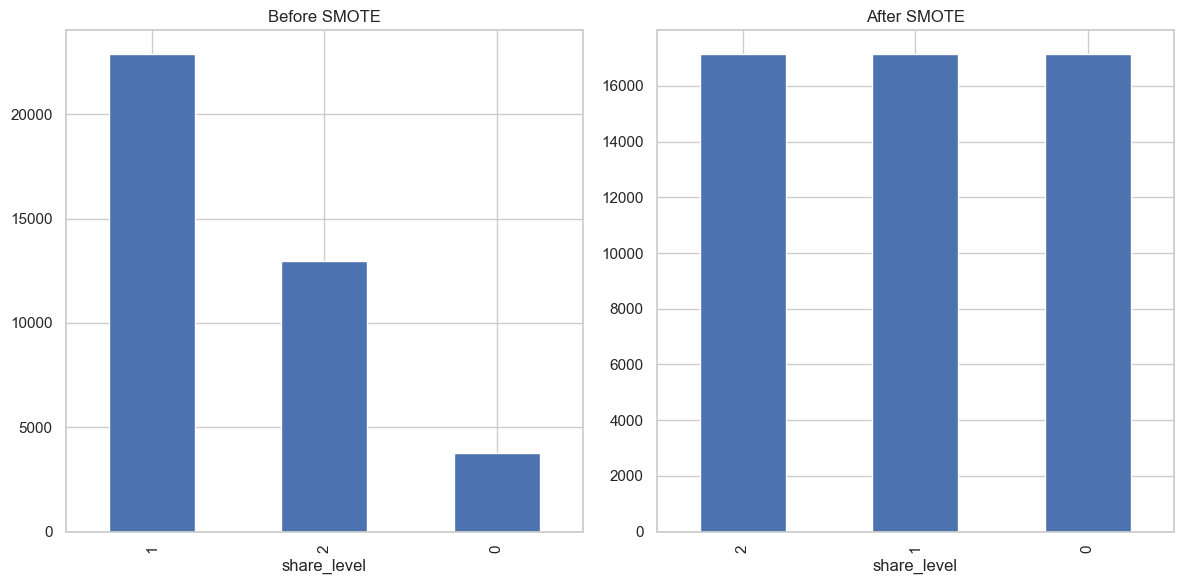

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot 1
articles['share_level'].value_counts().plot(kind='bar')
plt.title('Before SMOTE')

y = articles['share_level']
X = explanatory_variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)


plt.subplot(1, 2, 2) 
y_train.value_counts().plot(kind='bar')
plt.title('After SMOTE')

plt.tight_layout()  
plt.show()

# 4. Prepped Data Review


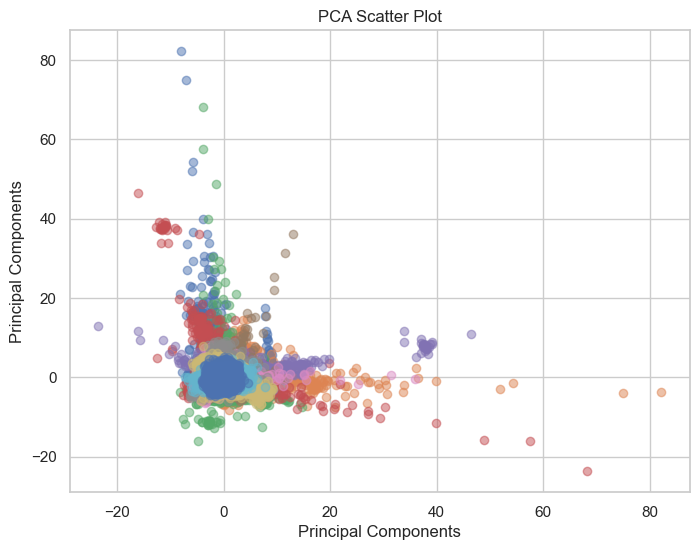

In [28]:
plt.figure(figsize=(8, 6))
for i in range(n_components-1):
    plt.scatter(X_pca_selected[:, i], X_pca_selected[:, i+1], alpha=0.5)
    plt.xlabel('Principal Components')
    plt.ylabel('Principal Components')
    plt.title('PCA Scatter Plot')
    plt.grid(True)
plt.show()

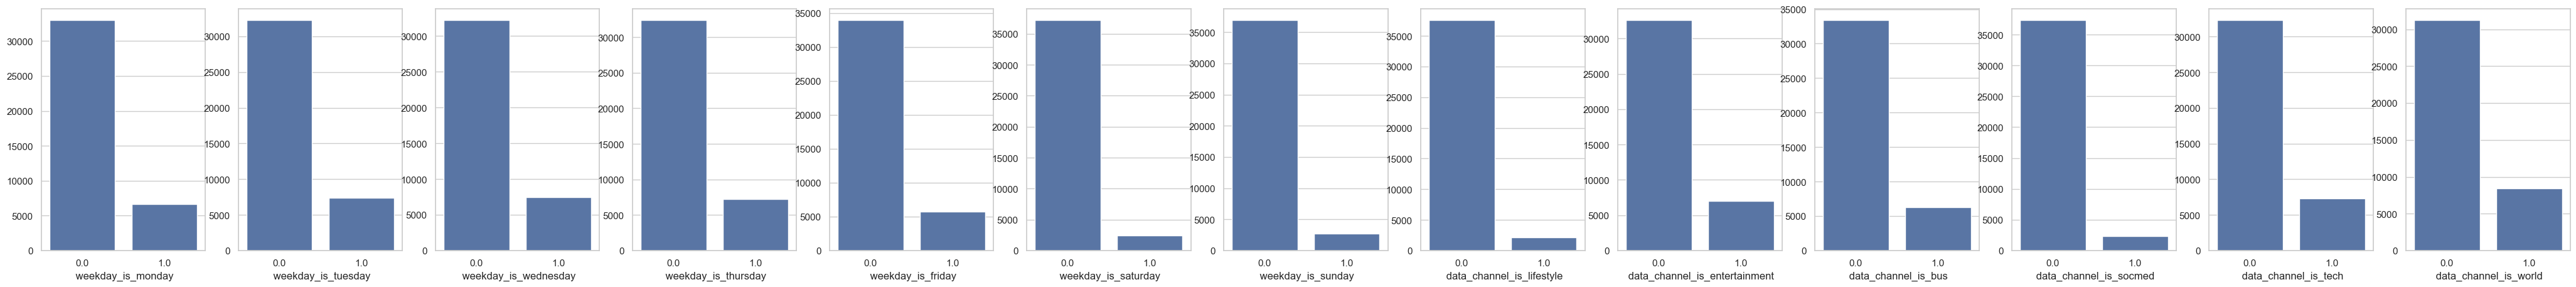

In [29]:
categorical= [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday',' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world']
bar_df(categorical,explanatory_variables)

Use the heatmap to check the correlation between the explanatory variables.

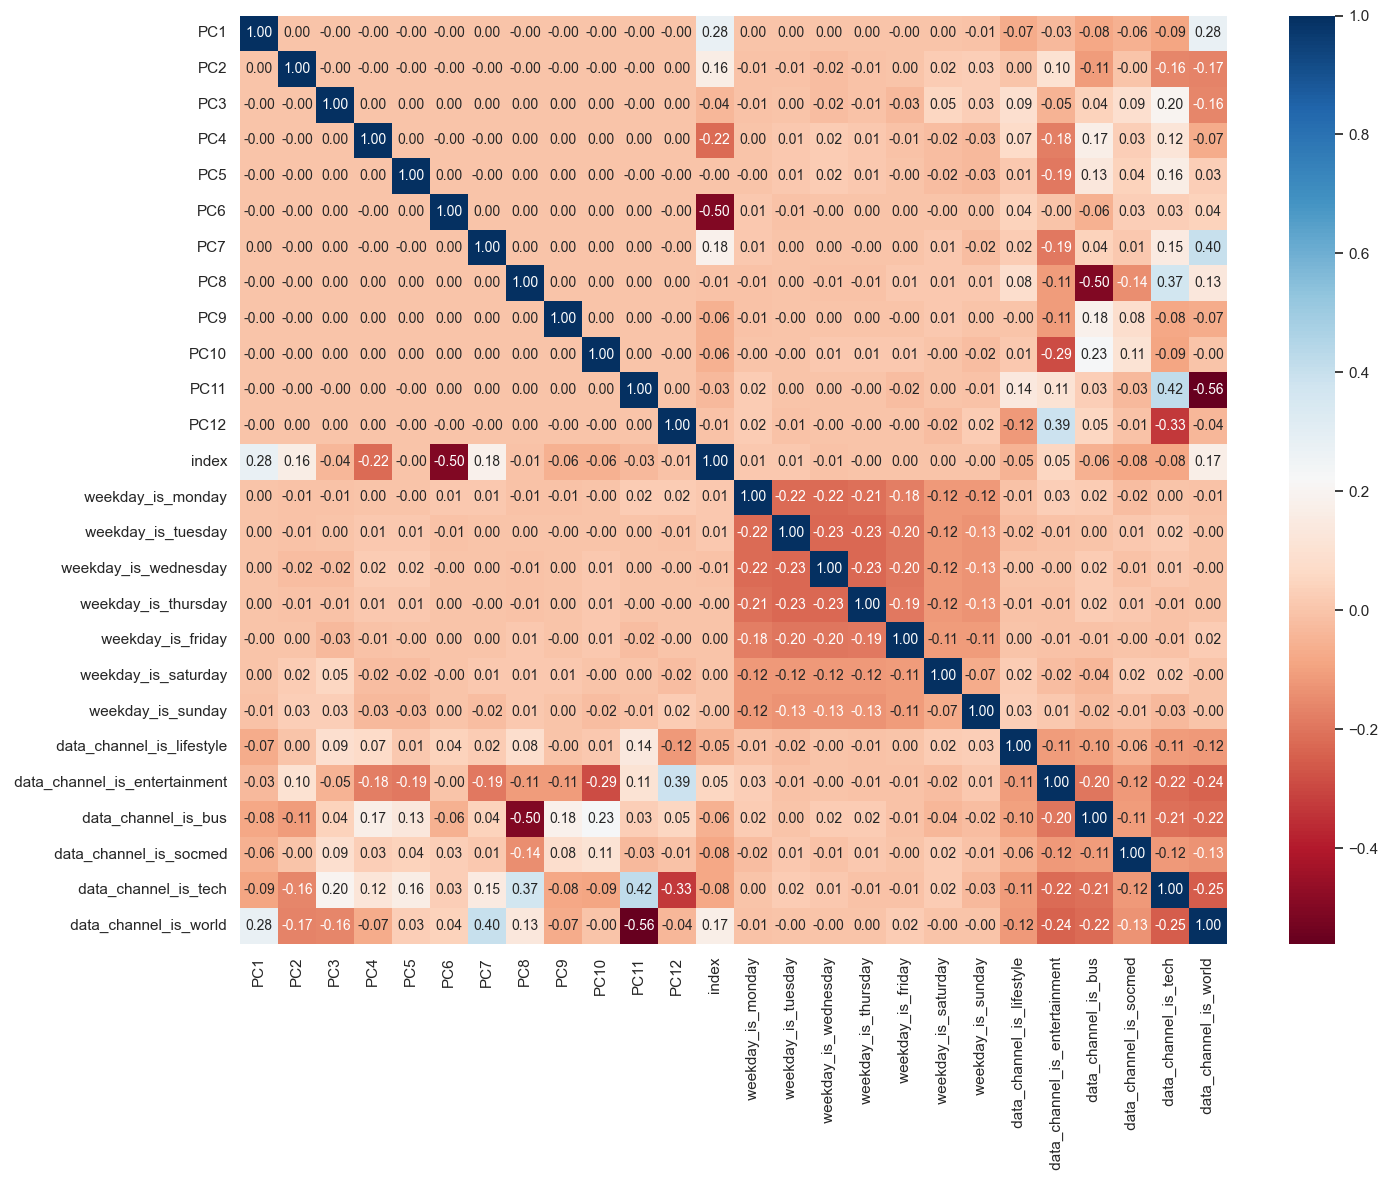

In [30]:
plt.figure(figsize=(15, 12))
corr = explanatory_variables.corr()
corr_rounded = corr.round(2)

sns.heatmap(corr_rounded, cmap="RdBu", xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f", annot_kws={"size": 10})

plt.tight_layout()
plt.show()


# 5. Neural Network Modeling

The code that follows builds, trains, and evaluates three different configurations of feedforward neural network models. Each model uses the same explanatory variables

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Input

- #### Model 1
Use two hidden layers, each layer contains 64 neurons, and the activation function is ReLU

In [65]:
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- #### Model 2
Use three hidden layers. The first layer contains 128 neurons, and subsequent layers contain 64 neurons. A Dropout layer is added to prevent overfitting. The activation function is ReLU.

In [66]:
model2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- #### Model 3
Using four hidden layers, the activation function is tanh

In [67]:
model3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='tanh', input_dim=X_train.shape[1]),
    Dense(100, activation='tanh'),
    Dense(50, activation='tanh'),
    Dense(3, activation='softmax')
])
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Each model will be trained below, fitted using the training data, and evaluated and tuned using the validation set.

In [35]:
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - accuracy: 0.3525 - loss: 66.5701 - val_accuracy: 0.0069 - val_loss: 88.3777
Epoch 2/50
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.3686 - loss: 32.4744 - val_accuracy: 0.3080 - val_loss: 17.5316
Epoch 3/50
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.3759 - loss: 24.8807 - val_accuracy: 0.7515 - val_loss: 1.0093
Epoch 4/50
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.3767 - loss: 18.8303 - val_accuracy: 0.3206 - val_loss: 12.6530
Epoch 5/50
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.3893 - loss: 13.4909 - val_accuracy: 0.3796 - val_loss: 6.3323
Epoch 6/50
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.3878 - loss: 11.0460 - val_accuracy: 0.0398 - val_loss: 11.1122
Epoch 7/50
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.3847 - loss: 10.5634 - val_accuracy: 0.0918 - val_loss: 22.0403
Epoch 8/50
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accura

We will now evaluate the performance of each model on the test set to see how it performs on unseen data.

In [36]:
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
print(f'Model 1 Test Accuracy: {test_acc1:.3f}')

test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
print(f'Model 2 Test Accuracy: {test_acc2:.3f}')

test_loss3, test_acc3 = model3.evaluate(X_test, y_test)
print(f'Model 3 Test Accuracy: {test_acc3:.3f}')

310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.5782 - loss: 1.0841
Model 1 Test Accuracy: 0.576
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.5806 - loss: 1.0806
Model 2 Test Accuracy: 0.579
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - accuracy: 0.5804 - loss: 1.0964
Model 3 Test Accuracy: 0.579


# 6. Select Models

This part is selecting the best model among the three neural networks included evaluating performance metrics such as accuracy, precision, recall, F1-score, and loss. We aim to choose a model that not only performs well in accuracy but also balances precision and recall effectively, to ensure robust predictions across various classes.

In [71]:
articles.columns = articles.columns.str.strip()
explanatory_variables.columns = explanatory_variables.columns.str.strip()

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical

def evaluate_model(model, X, y, n_splits=5):
    X = np.array(X)
    y = np.array(y)

    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    losses = []

    for train_idx, test_idx in kfold.split(X, y):
        # Fit the model
        model.fit(X[train_idx], y[train_idx], epochs=50, batch_size=32, verbose=0)
        
        # Predict on the test split
        y_pred = model.predict(X[test_idx], verbose=0)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Evaluate the model
        evaluation = model.evaluate(X[test_idx], y[test_idx], verbose=0)
        accuracies.append(evaluation[1])
        precisions.append(precision_score(y[test_idx], y_pred_classes, average='macro'))
        recalls.append(recall_score(y[test_idx], y_pred_classes, average='macro'))
        f1_scores.append(f1_score(y[test_idx], y_pred_classes, average='macro'))
        losses.append(evaluation[0])

    return np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1_scores), np.mean(losses)

results = []
models = [model1, model2, model3] 
model_names = ["Neural Network 1", "Neural Network 2", "Neural Network 3"]

for i, model in enumerate(models):
    acc, prec, rec, f1, loss = evaluate_model(model, X_train, y_train)
    results.append([model_names[i], acc, prec, rec, f1, loss])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Loss'])
print(results_df)


              Model  Accuracy  Precision    Recall  F1-Score      Loss
0  Neural Network 1  0.338856   0.655512  0.338875  0.179626  1.094314
1  Neural Network 2  0.337476   0.596174  0.337495  0.176336  1.094866
2  Neural Network 3  0.338545   0.571669  0.338545  0.179402  1.095750


From the above result, Neural Network 1 was selected as the preferred model. Alouthgh they all have little accuracy, model 1 shows a better balance in precision compared to Neural Network 2 and a comparable performance to Neural Network 3 in terms of accuracy and F1-score, it also has the smallest loss.

In [69]:
predictions_1 = model1.predict(X_test)
predictions_1 = np.argmax(predictions_1, axis=1)
report = classification_report(y_test, predictions_1)
print(report)


310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
              precision    recall  f1-score   support

           0       0.27      0.01      0.01       979
           1       0.58      0.99      0.73      5746
           2       0.28      0.00      0.01      3186

    accuracy                           0.58      9911
   macro avg       0.38      0.33      0.25      9911
weighted avg       0.45      0.58      0.43      9911



The results showed that while model 1 performed not very well in terms of accuracy than other model, and its ability to differentiate between classes was limited, with a high recall (99%) for class 1 but almost zero recognition of classes 0 and 2.

# 7. Conclusions

In this project, we explored and modeled the Online News Popularity dataset to predict article shares. The process began with EDA to identify data characteristics and address any quality issues. We prepared the data through cleaning and transformations, then attempted dimensionality reduction using PCA. We developed three neural network models, each with different architectures. These models were evaluated based on accuracy, precision, recall, F1-score, and loss. And we focused on model 1 as a best balance among these metrics.

The selected model, despite being the best among those tested, showed limitations in distinguishing different levels of popularity, means the need for further model refinement and possibly exploring more advanced machine learning strategies. 

# Reference: 
- LinearRegression: https://scikit-learn.org
- dataset: https://archive.ics.uci.edu/dataset/332/online+news+popularity
- Neural Networks: https://github.com/joelgrus/data-science-from-scratch/blob/master/scratch/neural_networks.py
- The Perceptron Algorithm: https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/ 